# Introdução à biblioteca NetworkX e à Programação Inteira com SCIP

## A biblioteca NetworkX para manipulação de grafos.

A biblioteca `NetworkX` diponibiliza implementações de vários tipos de grafos e de muitos algoritmos para os analisar e visualizar. Para importar esta biblioteca de forma qualificada faz-se o seguinte.

In [23]:
import networkx as nx

O tutorial desta biblioteca pode ser encontrado em https://networkx.github.io/documentation/stable/tutorial.html.

### Exercício 1

Um grafo *orientado* e *não pesado* é um par $(V,E)$ onde $V$ é um conjunto finito de vértices e $E$ uma relação binária em $V$, o conjunto de *arcos* ou *arestas* do grafo.

Um grafo *não pesado* pode ser representado usando *listas de adjacências*. Em Python é
possível implementar as ditas usando um dicionário de listas, onde a cada vértice temos associada a sua lista
de adjacentes (vértices directamente ligados através de uma aresta).

Se o grafo for também *não orientado* bastará desdobrar cada aresta em duas adjacências.

Por exemplo, o grafo

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/320px-6n-graf.svg.png" width=200/>


pode ser armazenado no dicionário `adj` da seguinte forma.

In [24]:
adj = {1:[2,5],2:[1,3,5],3:[2,4],4:[3,5,6],5:[1,2,4],6:[4]}

Implemente uma função `converte` que converte um grafo implementando com dicionários do python para um grafo do NetworkX.

In [25]:
def converte(adj):
  # completar
  G = nx.Graph()
  for node in list(adj.keys()):
    G.add_node(node)
    for connection in adj[node]:
      G.add_edge(node, connection)
  return G

graph = converte(adj)
nx.to_dict_of_lists(graph) # converte o grafo para um dicionário de listas

{1: [2, 5], 2: [1, 3, 5], 5: [1, 2, 4], 3: [2, 4], 4: [3, 5, 6], 6: [4]}

A biblioteca `NetworkX` disponibiliza muitos algoritmos para analisar grafos. Por exemplo, a função `shortest_path` dá o caminho mais curto entre dois vértices.

In [26]:
nx.shortest_path(graph,1,3)

[1, 2, 3]

 A função `diameter` permite saber o diâmetro de um grafo (i.e., a distância entre os seus vértices mais afastados).

In [27]:
nx.diameter(graph)

3

Também podemos utilizar as bibliotecas `NetworkX` e `Matplotlib` (`pip install matplotlib`) para desenhar o grafo exemplo (conforme explicado em https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs).

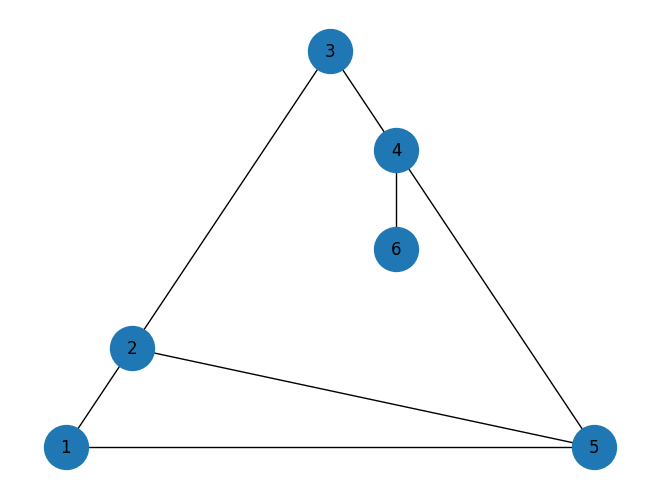

In [28]:
nx.draw(graph,pos=nx.planar_layout(graph),with_labels=True,node_size=1000)

### Exercício 2

A biblioteca `NetworkX` disponibiliza também vários geradores de grafos pré-definidos, conforme documentação em https://networkx.github.io/documentation/stable/reference/generators.html.
    Use esses geradores para criar um grafo degenerado que é um ciclo com 100 vértices.
    Desenhe esse grafo e calcule o seu diâmetro
    (que deverá ser 50).

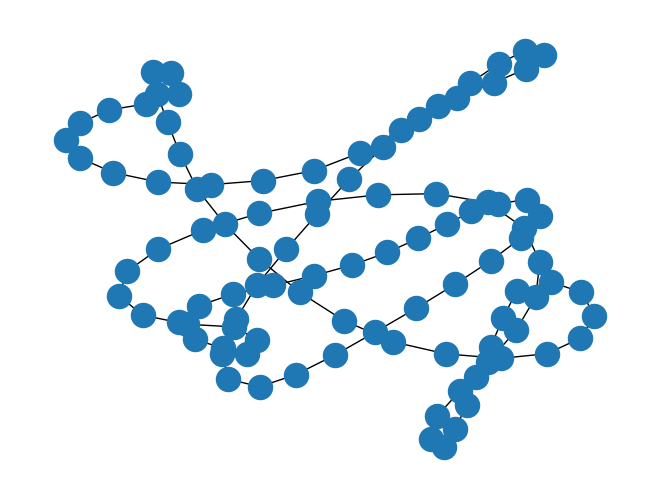

In [29]:
# completar
cgraph = nx.cycle_graph(100)
nx.diameter(cgraph)
nx.draw(cgraph)

Os vértices e as arestas de um grafo em `NetworkX` podem ter atributos. Por exemplo, podemos usar o atributo `color` para definir a cor de cada vértice. Os atributos podem ser definidos de muitas formas, por exemplo, usando a função `set_node_attributes`. O código seguinte começa por gerar o grafo de Petersen, um conhecido grafo com 10 vértices (https://en.wikipedia.org/wiki/Petersen_graph), usando a função `petersen_graph`. Depois define o atributo `color` de todos os vértices com a cor `red`.

In [30]:
petersen = nx.petersen_graph()
nx.set_node_attributes(petersen,'red','color')
print(petersen.nodes.data())

[(0, {'color': 'red'}), (1, {'color': 'red'}), (2, {'color': 'red'}), (3, {'color': 'red'}), (4, {'color': 'red'}), (5, {'color': 'red'}), (6, {'color': 'red'}), (7, {'color': 'red'}), (8, {'color': 'red'}), (9, {'color': 'red'})]


É possível alterar ou acrescentar um atributo a um vértice acedendo ao respectivo dicionário de atributos.

In [31]:
petersen.nodes[0]['color'] = 'yellow'
print(petersen.nodes.data())

[(0, {'color': 'yellow'}), (1, {'color': 'red'}), (2, {'color': 'red'}), (3, {'color': 'red'}), (4, {'color': 'red'}), (5, {'color': 'red'}), (6, {'color': 'red'}), (7, {'color': 'red'}), (8, {'color': 'red'}), (9, {'color': 'red'})]


Infelizmente, a função `draw` não tem este atributo em consideração.

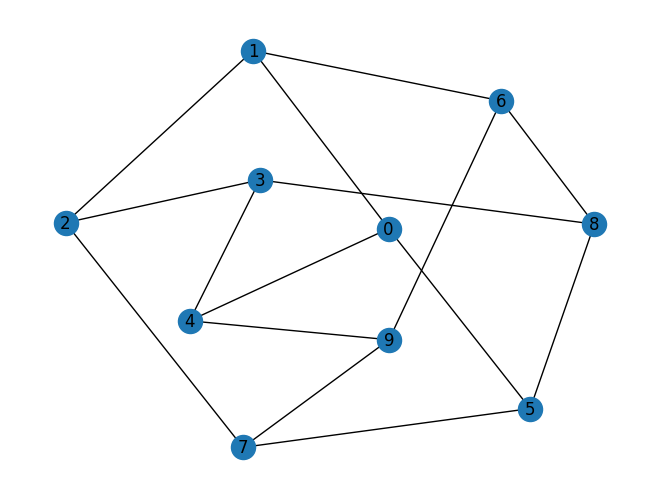

In [32]:
nx.draw(petersen,with_labels=True)

Um dos parâmetros da função `draw` é o `node_color`, que permite definir uma cor para todos os vértices ou passar uma lista com uma cor diferente para cada vértice.

### Exercício 3

Defina uma função `draw_with_colors` que, dado um grafo onde os vértices têm o atributo `color` definido, desenhe esse grafo tendo as cores nesse atributo em consideração.

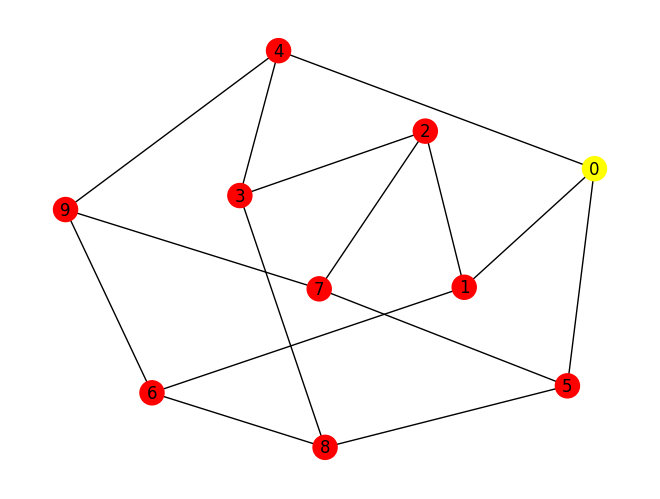

In [33]:
def draw_with_colors(graph):
    # completar
    colors = [graph.nodes[i]['color'] for i,node in enumerate(graph.nodes)]
    nx.draw(graph, node_color = colors, with_labels=True)

draw_with_colors(petersen)

## O problema da coloração de grafos

O problema da *coloração de grafos* (https://en.wikipedia.org/wiki/Graph_coloring) consiste em descobrir uma atribuição de cores aos vértices, de tal forma que vértices adjacentes não tenham a mesma cor. Temos duas variantes deste problema:
- Problema de decisão: dado um grafo e um número não negativo $k$ determinar se é possível colorir o grafo com no máximo $k$ cores, devolvendo uma coloração válida se tal for possível.
- Problema de optimização: dado um grafo determinar o menor $k$ para o qual isso é possível (o *número cromático* do grafo).

Por exemplo, o grafo de Petersen tem número cromático 3.

### Exercício 4

Defina a função `valid_color` que testa se um grafo tem uma coloração válida.

In [34]:
def valid_color(graph):
    # completar
    nodes = graph.nodes
    for o,d in graph.edges():
        if o<d:
            if nodes[o]['color'] == nodes[d]['color']:
                return False
    return True

if valid_color(petersen):
  print("Colors are valid.")
else:
  print("Not valid colors.")

Not valid colors.


## Modelação da coloração de grafos com Programação Inteira

É possível usar programação inteira para resolver o problema de colorir um grafo $(V,E)$ com $k$ cores. Para tal, vamos necessitar de $|V| \times k$ variáveis inteiras binárias, onde a variável $x_{v,c}$ determina se o vértice $v$ tem cor $c$. Temos também as seguintes restrições:

1. Para cada aresta $(o,d) \in E$ e cor $0 <= c < k$, $o$ e $d$ não podem ter ambos a cor $c$.
1. Cada vértice $v$ tem exactamente uma cor.

### Exercício 5

Indique as fórmulas que modelam estas duas restrições.

$ (completar) $

A. $\forall (o,d) \in E, c \in \{1,...,k\}: x_{o,c} + x_{d,c} \leq 1$

B. $\forall v \in V: \sum_{c=1}^k x_{v,c}=1$

### Exercício 6

Defina a seguinte função que testa se é possível colorir um grafo com $k$ cores usando o OR-Tools com o *solver* SCIP. Se for possível, deve guardar a coloração no grafo (no atributo `color`). Sugere-se que use um dicionário `x` para guardar as varáveis, sendo que em `x[v,c]` será armazenada a variável $x_{v,c}$. Para criar um nome único para as variáveis sugere-se que use [f-strings](https://peps.python.org/pep-0498/). Por exemplo, pode usar a expressão `f'x[{v},{c}]'` para criar o nome para a variável em ``x[v,c]``.

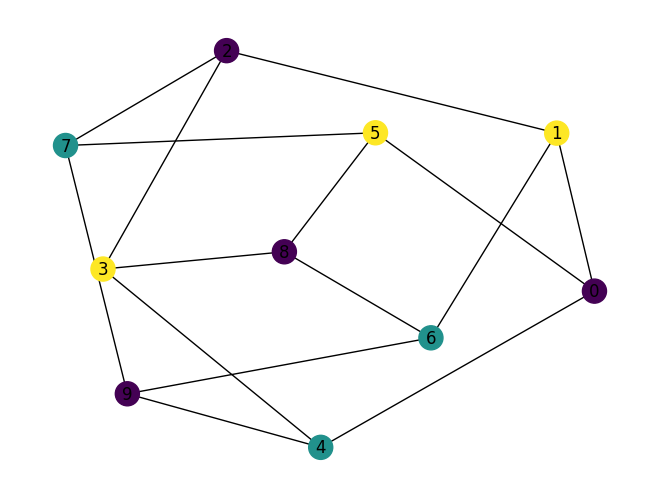

In [35]:
from ortools.linear_solver import pywraplp

def get_color(x, v, k):
    found = 0
    for c in range(k):
        if x[v,c].solution_value() == 1:
            found += 1
            color = c
    assert found == 1
    return color

def ip_color(graph,k):
    # completar
    N = graph.number_of_nodes()
    solver = pywraplp.Solver.CreateSolver("SCIP")
    
    x = {}
    for v in range(N): 
        for c in range(k):
            x[v,c] = solver.IntVar(0, k-1, f"x[{v},{c}]")

    for o,d in graph.edges:
        if o<d:
            for c in range(k):
                adj_colors = [x[o,c], x[d,c]]
                solver.Add(solver.Sum(adj_colors) <= 1)

    for v in graph.nodes:
        node_colors = [x[v,c] for c in range(k)]
        solver.Add(solver.Sum(node_colors) == 1)

    if solver.Solve() == pywraplp.Solver.INFEASIBLE:
        print("Not feasible.")
    else:
        for v in range(N):
            color = get_color(x, v, k)
            graph.nodes[v]['color'] = color


ip_color(petersen,3)
draw_with_colors(petersen)

### Exercício 7

Como o SCIP suporta problemas de optimização em programação inteira, podemos implementar directamente o problema de optimização da coloração de grafos sem usar um método de pesquisa linear que tenta todos os possíveis números cromáticos. O objectivo deste exercício é implementar este problema em SCIP, ou seja, determinar uma coloração válida que minimize o número de cores.

Sugere-se que, para além das variáveis binárias que usou no exercício 6, utilize uma variável binárias $u_c$ por cada cor $c$ possível (note que num grafo o número máximo de cores necessário será idêntico ao número de vértices). Esta variável deve ter o valor 1 sse a cor $c$ for usada nalgum vértice. Dado este conjunto de variáveis o objectivo da optimização será minimizar:

$$
\sum_c u_c
$$

O valor de cada variável $u_c$ pode ser definido como o valor máximo das variáveis $x_{v,c}$ para todo o vértice $v$.

> Solution is optimal.
> The chromatic number is 3.0


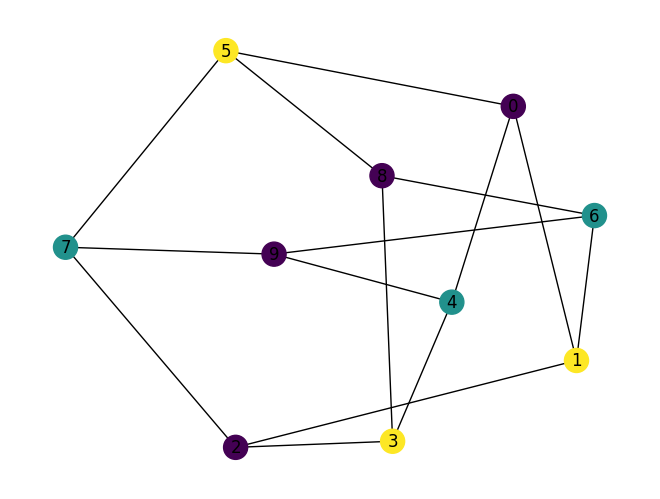

In [36]:
def ip_find_optimal_coloring(graph):
    # completar
    N = graph.number_of_nodes()
    kmax = N
    solver = pywraplp.Solver.CreateSolver("SCIP")

    x = {}
    for v in range(N): 
        for c in range(kmax):
            x[v,c] = solver.IntVar(0, kmax-1, f"x[{v}, {c}]")
            
    u = [solver.BoolVar(f"u[{c}]") for c in range(kmax)]

    for c,uc in enumerate(u):
        for v in range(N):
            solver.Add(uc >= x[v, c])
        '''
        Note: it is not strictly necessary to explicitly enforce 
        the following restraint, as it will be imposed implicitly 
        by the optimization target.
        '''
        solver.Add(uc <= solver.Sum([x[v, c] for v in range(N)]))

    for o,d in graph.edges:
        for c in range(kmax):
            adj_colors = [x[o, c], x[d, c]]
            solver.Add(solver.Sum(adj_colors) <= 1)

    for v in graph.nodes:
        node_colors = [x[v, c] for c in range(kmax)]
        solver.Add(solver.Sum(node_colors) == 1)

    solver.Minimize(solver.Sum(u))
    status = solver.Solve()
    if status == pywraplp.Solver.INFEASIBLE:
        print("Not feasible.")
    else:
        if status == pywraplp.Solver.OPTIMAL:
            print("> Solution is optimal.")
            
        uopt = [u[c].solution_value() for c in range(kmax)]
        kopt = sum(uopt)
        print(f"> The chromatic number is {kopt}")
        
        for v in range(N):
            color = get_color(x, v, kmax)
            graph.nodes[v]['color'] = color
            
    return kopt

kopt = ip_find_optimal_coloring(petersen)
draw_with_colors(petersen)

## Um problema de alocação

Os problemas de alocação modelam uma relação entre dois tipos de entidades: compromissos e recursos. Adicionalmente, as restrições sobre a alocação de recursos a compromissos classificam-se em dois tipos: obrigações e limitações.

Vamos agora considerar um pequeno problema de alocação. Pretende-se que faça a modelação do problema em Programação Inteira e que use o SCIP para o resolver.

### Regime de trabalho híbrido

Uma empresa quer colocar todos os seus colaboradores em regime de trabalho híbrido. Isto é, uns dias em teletrabalho e outros dias trabalho presencial. A empresa tem $P$ colaboradores e o número de dias de trabalho é $D$.

Este novo regime segue algumas restrições:
1. Cada colaborador tem de estar em trabalho presencial 2x por semana.
2. Cada dia deve ter pelo menos um colaborador em trabalho presencial.
3. Existe pelo menos um dia em que todos os colaboradores estão em trabalho presencial.

Este é um problema de alocação. Pretende-se definir os dias em que cada colaborador deve estar em trabalho presencial, de modo a obedecer às restrições estabelecidas.
Vamos usar uma família $x_{p,d}$ de variáveis binárias (i.e., que assumem valores inteiros $\{0,1\}$), com a seguinte semântica

$$x_{p,d} = 1 \quad \mathbf{sse} \quad \mbox{o colaborador $p$ está em trabalho presencial no dia $d$} $$

Estas $P\times D$ variáveis são convenientemente representadas numa matriz $X$ instanciável com valores
$\{0,1\}^{P\times D }$, a que se costuma chamar *matriz de alocação*.


Começamos por importar a biblioteca de programação linear do OR-Tools, criar uma instância do *solver*
e definir os valores para as constantes $P$ e $D$. De seguida temos que declarar a matriz de alocação $X$.

In [37]:
from ortools.linear_solver import pywraplp

solver = pywraplp.Solver.CreateSolver('SCIP')

P = 5 # número de colaboradores
D = 5 # número de dias

### Exercício 8

Complete a declaração da matriz de alocação $X$ como um dicionário.

In [38]:
X = {}
# completar
for p in range(P):
    for d in range(D):
        X[p,d] = solver.BoolVar(f'X[{p},{d}]')

Passamos agora à modelação das restrições e à sua introdução no *solver*.

A restrição

1. Cada colaborador tem de estar em trabalho presencial 2x por semana.

pode expressar-se da seguinte forma:

$$
\forall p < P.\;\sum_{d < D} x_{p,d} = 2
$$


In [44]:
for p in range(P):
    solver.Add(sum([ X[p,d] for d in range(D) ]) == 2)

### Exercício 9
Apresente a fórmula que modela a segunda restrição e acrescente-a ao problema.

2. Cada dia deve ter pelo menos um colaborador em trabalho presencial.

$(completar)$

$$
\forall d < D.\;\sum_{p < P} x_{p,d} \geq 1
$$


In [40]:
# completar
for d in range(D):
    solver.Add(sum([X[p,d] for p in range(P)]) >= 1)

### Exercício 10
Queremos agora acrescentar a terceira restrição

3. Existe pelo menos um dia em que todos os colaboradores estão em trabalho presencial.

Esta restrição pode ser definida pela seguinte fórmula:
$$
\exists_{d<D}. \sum_{p < P} x_{p,d} = P
$$

Como podemos ver, esta restrição representa uma disjunção, que por norma não é suportada pelos *solvers* de programação inteira.
De forma a conseguir modelar esta restrição,
podemos acrescentar uma família de variáveis binárias $u_d$ com a seguinte semântica:

$$
u_d = 1 \quad \mathbf{sse} \quad \mbox{no dia $d$ todos os colaboradores estão em trabalho presencial}
$$

A nossa restrição pode agora ser modelada da seguinte forma:
$$
\sum_{d < D} u_d \geq 1
$$

Acrescente esta restrição ao solver.

In [50]:
U = {}
# completar
for d in range(D):                                   # d -> dia; D -> 5 dias (1 semana de trabalho)
    U[d] = solver.BoolVar(f'u[{d}]')
print (U[d])
solver.Add(solver.Sum([U[d] for d in range(D)])>=1);

u[4]


O valor de $u_{d}$ também deve alguma forma limitar inferiormente o número de colaboradores em trabalho presencial no dia $d$. Para isso, precisamos  de relacionar as variáveis $u_{d}$ e a matriz de alocação $X$ através da seguinte restrição:

$$
\forall_{d<D}. \; P \times u_d \leq \sum_{p < P} x_{p,d} 
$$

Acrescente esta restrição ao solver.

In [42]:
# completar
for d in range(D):
    solver.Add(P*U[d] <= solver.Sum([X[p,d] for p in range(P)])) 
    
    '''
    Note: it is not strictly necessary to enforce the following restraint
    for the solution to fulfil the requirements. However, it would technically 
    be necessary to enforce the bidirectionality in the 'iff' definition of 
    the u_d variables.
    '''
    solver.Add(U[d] >= (solver.Sum([X[p,d] for p in range(P)])-P+1)) 

Podemos agora ver a solução do solver para este problema.

In [43]:
status = solver.Solve()
if status == pywraplp.Solver.OPTIMAL:
  print("> Optimal solution found.")
if status == pywraplp.Solver.FEASIBLE:
  print("> The problem is feasible. ")
if True:
    print("X:")
    for p in range(P):
        for d in range(D):
            print(int(X[p,d].solution_value()), end=' ')

        print()

    print("U:")
    for d in range(D):
        print(int(U[d].solution_value()), end=' ')

> Optimal solution found.
X:
1 1 1 1 1 
1 1 1 1 1 
1 1 1 1 1 
1 1 1 1 1 
1 1 1 1 1 
U:
1 1 1 1 1 